In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [7]:
# random tensor
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.51114523]
 [-0.04214098]
 [-0.4017505 ]], shape=(3, 1), dtype=float32)


In [8]:
# random with uniform distribution
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.15212083]
 [0.3816378 ]
 [0.57091343]], shape=(3, 1), dtype=float32)


In [10]:
import numpy as np
x = np.ones(shape=(2,2))
print(x)
x[0,0] = 0.
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [11]:
x = tf.ones(shape=(2,2))
print(x)
x[0,0] = 0.
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

This fails because tensors are not assignable.. have to use tf.Variable class

In [12]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.16753572],
       [ 0.4409822 ],
       [ 1.2797294 ]], dtype=float32)>


In [13]:
# assign new value to tf variable
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [16]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [19]:
# using gradienttape scope
input_var = tf.Variable(initial_value=3.)
print(input_var)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(6.0, shape=(), dtype=float32)


In [21]:
# using gradienttape with constant tensor input
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [51]:
# creating synthetic data
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, .5],[.5,1]],
    size=num_samples_per_class
)
positive_samples  = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, .5], [.5, 1]],
    size=num_samples_per_class
)

In [52]:
# stack classes into single array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [53]:
# generate targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

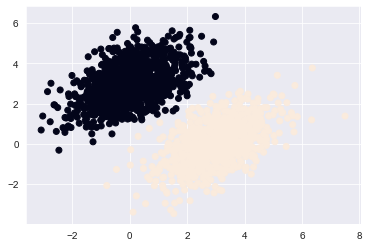

In [54]:
# plot two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [55]:
# initialize values for W and b
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [56]:
# forward pass function
def model(some_inputs):
    return tf.matmul(inputs, W) + b

In [57]:
# loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [58]:
# the training step
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])

    # update weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss

In [60]:
# batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0284
Loss at step 1: 0.0281
Loss at step 2: 0.0279
Loss at step 3: 0.0276
Loss at step 4: 0.0274
Loss at step 5: 0.0272
Loss at step 6: 0.0270
Loss at step 7: 0.0268
Loss at step 8: 0.0267
Loss at step 9: 0.0265
Loss at step 10: 0.0264
Loss at step 11: 0.0263
Loss at step 12: 0.0262
Loss at step 13: 0.0261
Loss at step 14: 0.0260
Loss at step 15: 0.0259
Loss at step 16: 0.0258
Loss at step 17: 0.0258
Loss at step 18: 0.0257
Loss at step 19: 0.0256
Loss at step 20: 0.0256
Loss at step 21: 0.0255
Loss at step 22: 0.0255
Loss at step 23: 0.0255
Loss at step 24: 0.0254
Loss at step 25: 0.0254
Loss at step 26: 0.0254
Loss at step 27: 0.0253
Loss at step 28: 0.0253
Loss at step 29: 0.0253
Loss at step 30: 0.0253
Loss at step 31: 0.0252
Loss at step 32: 0.0252
Loss at step 33: 0.0252
Loss at step 34: 0.0252
Loss at step 35: 0.0252
Loss at step 36: 0.0252
Loss at step 37: 0.0252
Loss at step 38: 0.0252
Loss at step 39: 0.0251


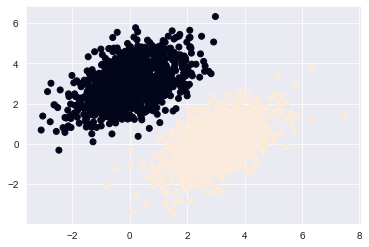

In [62]:
# plot how model classifies training data points
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

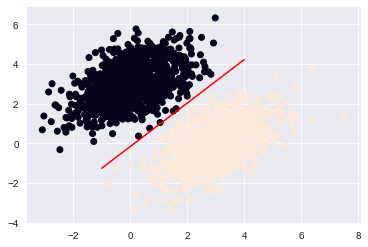

In [63]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x,y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] >0.5)

In [67]:
# dense layer implemented in layer subclass
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')

    def call(self, inputs):
        # forward pass method
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [68]:
# instantiate layer previously defined
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
# create some test inputs
input_tensor = tf.ones(shape=(2,784))
# call layer on inputs like function
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [69]:
# compile and fit in action
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [70]:
# fit in action
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Train on 2000 samples
Epoch 1/5
2000/2000 [==============================] - 0s 154us/sample - loss: 5.2250 - accuracy: 0.9905
Epoch 2/5
2000/2000 [==============================] - 0s 5us/sample - loss: 4.9628 - accuracy: 0.9905
Epoch 3/5
2000/2000 [==============================] - 0s 5us/sample - loss: 4.7384 - accuracy: 0.9900
Epoch 4/5
2000/2000 [==============================] - 0s 7us/sample - loss: 4.5250 - accuracy: 0.9900
Epoch 5/5
2000/2000 [==============================] - 0s 7us/sample - loss: 4.3178 - accuracy: 0.9890


In [71]:

history.history

{'loss': [5.224954315185547,
  4.96275012588501,
  4.738449764251709,
  4.524988174438477,
  4.317835659027099],
 'accuracy': [0.9905, 0.9905, 0.99, 0.99, 0.989]}

In [73]:
# using validation data to test model on "new" data
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Train on 1400 samples, validate on 600 samples
Epoch 1/5
1400/1400 [==============================] - 0s 227us/sample - loss: 0.1113 - binary_accuracy: 0.9364 - val_loss: 0.0390 - val_binary_accuracy: 0.9967
Epoch 2/5
1400/1400 [==============================] - 0s 59us/sample - loss: 0.0711 - binary_accuracy: 0.9657 - val_loss: 0.1667 - val_binary_accuracy: 0.7667
Epoch 3/5
1400/1400 [==============================] - 0s 57us/sample - loss: 0.0781 - binary_accuracy: 0.9407 - val_loss: 0.0384 - val_binary_accuracy: 0.9917
Epoch 4/5
1400/1400 [==============================] - 0s 61us/sample - loss: 0.0698 - binary_accuracy: 0.9593 - val_loss: 0.1811 - val_binary_accuracy: 0.6650
Epoch 5/5
1400/1400 [==============================] - 0s 62us/sample - loss: 0.0708 - binary_accuracy: 0.9414 - val_loss: 0.0922 - val_binary_accuracy: 0.9700


In [74]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

600/600 [==============================] - 0s 10us/sample - loss: 0.0922 - binary_accuracy: 0.9700


In [76]:
loss_and_metrics

[0.09218961874643962, 0.97]

In [77]:
preds = model.predict(val_inputs, batch_size=128)
print(preds[:10])

[[ 1.0074043 ]
 [ 0.40030962]
 [ 1.2438636 ]
 [ 1.4420104 ]
 [ 1.2598069 ]
 [-0.08276719]
 [ 1.1046407 ]
 [ 1.2694091 ]
 [ 0.04317421]
 [ 1.2507874 ]]
